In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#upload the data as data and getting 1st 5 head rows
data = pd.read_csv("C:/Users/surya/anaconda3/FILES_CSV/Assignments/SIMPLE_LIN_REGRESSION/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
#checking for duplicated values
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [6]:
#finding the count, mean, std dev, using description
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
#checking correlation between the data
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

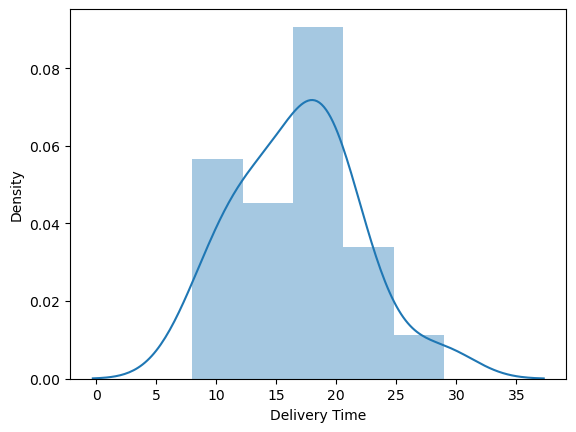

In [8]:
#plot distplot against Delv time
sns.distplot(data['Delivery Time'])

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

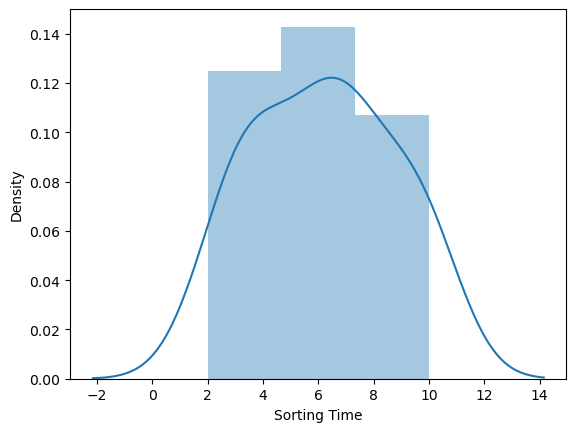

In [9]:
#plot - Sorting time
sns.distplot(data['Sorting Time'])

In [10]:
#save as data1 and renaming the column 
data1=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

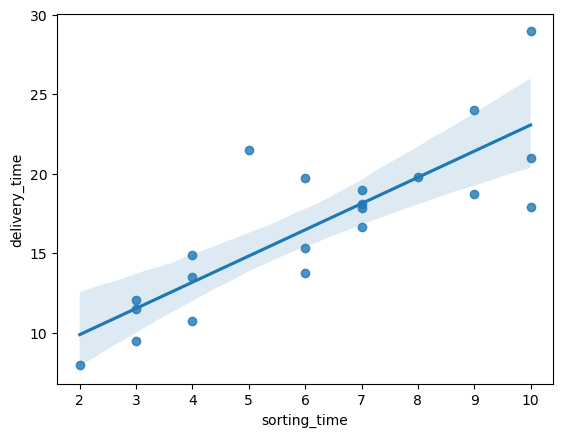

In [11]:
#finding the linearity of the data
sns.regplot(x=data1['sorting_time'],y=data1['delivery_time'])

In [12]:
#fitting the data to the model
model=smf.ols("delivery_time~sorting_time",data=data1).fit()

In [13]:
#finding the variables of the model parameter fitted
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [15]:
#finding r.squared and adjusted r.sqr
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [16]:
# lets assume sorting_time as 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [17]:
#Predict for 5 and 8 sorting_time
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [18]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [19]:
#model will shows the predicted values for sorting time 5 and 8
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [20]:
#Predict for 6 and 9 sorting_time
new_data1=pd.Series([6,9])
new_data1

0    6
1    9
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data1,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [22]:
#model will shows the predicted values for sorting time 6 and 9
model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64